# Machine Learning

In this exercise you'll explore and analyze a heart disease dataset. Find below a short description about its 14 columns:

1 - age  
2 - sex  
3 - chest pain type (4 values)  
4 - resting blood pressure  
5 - serum cholestoral in mg/dl  
6 - fasting blood sugar > 120 mg/dl  
7 - resting electrocardiographic results (values 0,1,2)  
8 - maximum heart rate achieved  
9 - exercise induced angina  
10 - oldpeak = ST depression induced by exercise relative to rest  
11 - the slope of the peak exercise ST segment  
12 - number of major vessels (0-3) colored by flourosopy  
13 - thal: 3 = normal; 6 = fixed defect; 7 = reversable defect  
14 - target (binary)

You'll also create a classification model to predict a patient's probability of having a heart disease given this information.

## Load dataset and Exploratory Data Analysis

Load the dataset provided and start exploring it. You can make it by clicking the *Upload* button from the *Files* section in the left panel or by including the shared folder in your Drive unit.  
Find and show relevant information. Use plots or visualizations that might be useful for you. Which variables are more relevant to predict if a person has or not a heart disease?

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#### Dataset quick inspection
Here we can observe if there is any problem with the dataset i.e if there is a need to fill a position of the dataset, the type of data inside the dataset...

In [2]:
dataset = pd.read_csv('heart_disease_dataset.csv')
print('Dataset shape:', dataset.shape)
dataset.head()

Dataset shape: (303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
daset_target = dataset.groupby("target").size()
print(daset_target)

target
0    138
1    165
dtype: int64


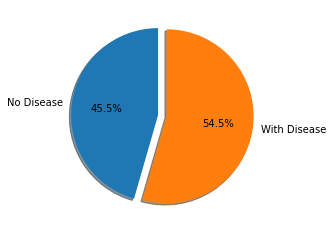

In [6]:
values = daset_target.values
fig, ax = plt.subplots()
ax.pie(values, explode=(0, 0.1),labels=['No Disease', 'With Disease'], autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

Over 50% of the studied population suffer a heart disease.

sex  target
0    0          24
     1          72
1    0         114
     1          93
dtype: int64


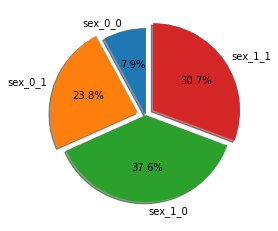

In [7]:
sex_dif = dataset.groupby(['sex', 'target']).size()
print(sex_dif)
fig, ax = plt.subplots()
ax.pie(sex_dif.values, explode=(0, 0.1, 0, 0.1), labels=['sex_0_0', 'sex_0_1', 'sex_1_0', 'sex_1_1'], autopct='%1.1f%%' ,shadow=True, startangle=90)
plt.show()

We can observe that for sex with label 0, on the studied population, exist a higher percetange of people that suffer a heart disease. Opposite to that, for the sex label 1, there is a bigger percentage of people who don't suffer a heart disease.

Text(0, 0.5, 'chol')

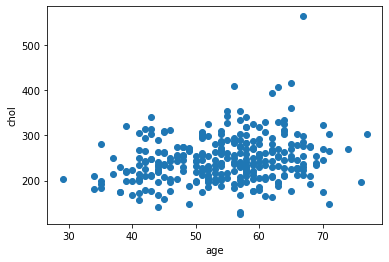

In [8]:
fig = plt.scatter(dataset['age'], dataset['chol'])
plt.xlabel('age')
plt.ylabel('chol')

We can observe that there is no dispersion between both variables and between the ages of 40 and 70

In [9]:
dataset_correlations = dataset.corr('spearman')
dataset_correlations

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.099131,-0.087494,0.285617,0.195786,0.113978,-0.132769,-0.398052,0.089679,0.268291,-0.184048,0.340955,0.087254,-0.238400
sex,-0.099131,1.000000,-0.062041,-0.052941,-0.151342,0.045032,-0.048389,-0.039868,0.141664,0.100715,-0.025010,0.119368,0.250821,-0.280937
cp,-0.087494,-0.062041,1.000000,0.035413,-0.091721,0.089775,0.065640,0.324013,-0.418256,-0.161449,0.159478,-0.216006,-0.207840,0.460860
trestbps,0.285617,-0.052941,0.035413,1.000000,0.126562,0.151984,-0.125841,-0.040407,0.052918,0.154267,-0.086570,0.090140,0.059673,-0.121593
chol,0.195786,-0.151342,-0.091721,0.126562,1.000000,0.018463,-0.161933,-0.046766,0.091514,0.045260,-0.012551,0.111981,0.083628,-0.120888
fbs,0.113978,0.045032,0.089775,0.151984,0.018463,1.000000,-0.081508,-0.014273,0.025665,0.028363,-0.045786,0.134513,-0.006737,-0.028046
restecg,-0.132769,-0.048389,0.065640,-0.125841,-0.161933,-0.081508,1.000000,0.087863,-0.077399,-0.077372,0.113661,-0.097862,-0.010982,0.148612
thalach,-0.398052,-0.039868,0.324013,-0.040407,-0.046766,-0.014273,0.087863,1.000000,-0.400860,-0.433241,0.436968,-0.257347,-0.160581,0.428370
exang,0.089679,0.141664,-0.418256,0.052918,0.091514,0.025665,-0.077399,-0.400860,1.000000,0.297173,-0.274475,0.162025,0.247113,-0.436757
oldpeak,0.268291,0.100715,-0.161449,0.154267,0.045260,0.028363,-0.077372,-0.433241,0.297173,1.000000,-0.594847,0.224895,0.255026,-0.421487


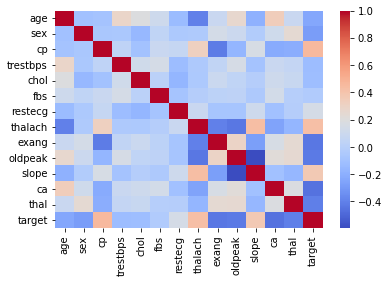

In [10]:
fig = sns.heatmap(dataset_correlations,
                  xticklabels=dataset_correlations.columns,
                  yticklabels=dataset_correlations.columns,
                  cmap='coolwarm')

With this HeatMap we can visually observe the correlation between all the variables inside the dataset. It is important to note that the correlation between the variables with themselves will always be 1 and that is why we observe the diagonal in read or with 1s at the table. 
Furthermore, study the p-value will be necessary to understand if the correlation between the selected variables is correct or is due to the randomness of the distributions. If the p-value is over 0.05 the correlation will be accepted. 

## Classification problem

Use the insights you gained from the dataset to develop a classification model. 

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix


In [12]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


First we are going to define which classes we want to cluster for the classifier and which will be the data for thtat.
    - Classes ---> Target 
    - Data ----> Rest of the dataset
   

In [13]:
x = np.array(dataset.iloc[:, 0:12])
y = np.array(dataset['target'])

Now we define our train and test data by splitting the dataset by the 80% for training and 20% for testing.

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2)

In [15]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1, metric='euclidean')
knn.fit(X_train, Y_train)

KNeighborsClassifier(metric='euclidean', n_jobs=-1)

In [17]:
y_pred = knn.predict(X_test)
accuracy = 100*knn.score(X_test, Y_test)
print(accuracy)

77.04918032786885


              precision    recall  f1-score   support

           0       0.81      0.71      0.76        31
           1       0.74      0.83      0.78        30

    accuracy                           0.77        61
   macro avg       0.78      0.77      0.77        61
weighted avg       0.78      0.77      0.77        61



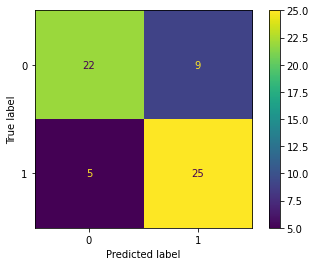

In [18]:
class_report = classification_report(Y_test, y_pred)
cm = confusion_matrix(Y_test, y_pred)
print(class_report)
plot_confusion_matrix(knn, X_test, Y_test)

We can observe that for the 31 samples with label= 0 (no disease), the model predicted 22 correctly and 9 wrong and for the 30 samples with label=1 (with disease) the model classified correctly 25 and 5 wrong.

A way to see if we can optimize the classifier would be to reduce the dimensions by using PCA or LDA and changing the metrics of the classifier.

In [19]:
pca = PCA(n_components=12)
train_pca = pca.fit_transform(X_train)
knnpca = KNeighborsClassifier(n_neighbors=5,n_jobs=-1,metric='euclidean')
knnpca.fit(train_pca, Y_train) 
testpca = pca.transform(X_test)
accuracy = 100*knnpca.score(testpca, Y_test)
print(accuracy)

77.04918032786885


In this case we can observe that the model will not perform better by reducing the dimensions of the data. In fact it will perform equal. 

In [20]:
lda = LinearDiscriminantAnalysis(n_components=1)
train_lda = lda.fit_transform(X_train,Y_train)
knnlda = KNeighborsClassifier(n_neighbors=5,n_jobs=-1,metric='euclidean')
knnlda.fit(train_lda, Y_train) 
testlda = lda.transform(X_test)
accuracy = 100*knnlda.score(testlda, Y_test)
print(accuracy)

77.04918032786885


## Conclusions and Next Steps

Develop any ideas you may have regarding the improvement of the solution. If given more time or resources, which steps would you like to take?

To improve the solution we can use other types of classifiers like Decision Trees, SVM... and try to optimize the model by doing a grid or random search on the svm model to improve the results. Furthermore, use different metrics on the classifier may result interesting to check in order to compare the performance of the models.

# Computer Vision

In this exercise you'll create a classifier for the rock, paper scissors game. In the [TensorFlow (TF) Dataset](https://colab.research.google.com/github/tensorflow/datasets/blob/master/docs/overview.ipynb#scrollTo=TensorFlow_Datasets) provided, feel free to analyze and discover useful information about the problem. Then, implement whatever Neural Network architecture you choose in order to correctly identify a player's take.

In [2]:
!pip install -q tfds-nightly tensorflow matplotlib

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow.keras import Sequential, optimizers, losses
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

print(tf.__version__)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

2.6.0
Num GPUs Available:  1


The loading code is already available to you. From now on, explore the dataset, make some example visualizations, and finally implement a classifier of your own. Have fun!

In [4]:
(ds_train, ds_test), ds_info = tfds.load(
    'rock_paper_scissors',
    split=['train', 'test'],
    shuffle_files=True,
    with_info=True
)

print(ds_info)

tfds.core.DatasetInfo(
    name='rock_paper_scissors',
    full_name='rock_paper_scissors/3.0.0',
    description="""
    Images of hands playing rock, paper, scissor game.
    """,
    homepage='http://laurencemoroney.com/rock-paper-scissors-dataset',
    data_path='/root/tensorflow_datasets/rock_paper_scissors/3.0.0',
    download_size=219.53 MiB,
    dataset_size=Unknown size,
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=3),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=372, num_shards=1>,
        'train': <SplitInfo num_examples=2520, num_shards=2>,
    },
    citation="""@ONLINE {rps,
    author = "Laurence Moroney",
    title = "Rock, Paper, Scissors Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/rock-paper-scissors-dataset"
    }""",
)


In [5]:
#reshaping of the image
INPUT_IMG_SIZE = 224
INPUT_IMG_SHAPE = (224, 224, 3)


#pre-processing of the input image 
def preprocess_image(sample):
    sample['image'] = tf.cast(sample['image'], tf.float32)
    sample['image'] = sample['image'] / 255.
    sample['image'] = tf.image.resize(sample['image'], [INPUT_IMG_SIZE, INPUT_IMG_SIZE])
    return sample

ds_train = ds_train.map(preprocess_image)
ds_test  = ds_test.map(preprocess_image)


The old signature is deprecated and will be removed. Please change your call to `tfds.show_examples(ds, info)`


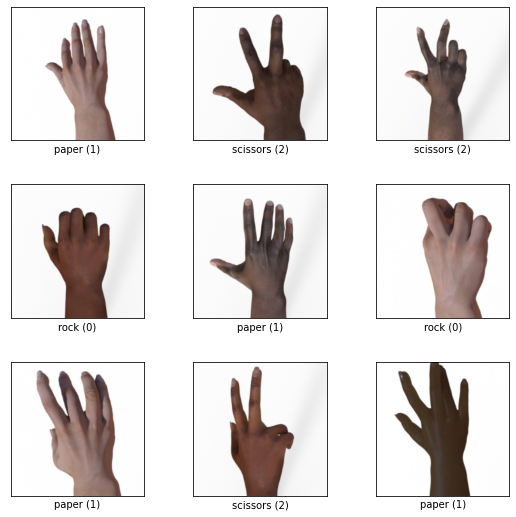

In [6]:
fig = tfds.show_examples(ds_info, ds_train)

In [8]:
train_numpy = np.vstack(tfds.as_numpy(ds_train))
test_numpy = np.vstack(tfds.as_numpy(ds_test))

train_images = np.array(list(map(lambda x: x[0]['image'], train_numpy)))
train_labels = np.array(list(map(lambda x: x[0]['label'], train_numpy)))

test_images = np.array(list(map(lambda x: x[0]['image'], test_numpy)))
test_labels = np.array(list(map(lambda x: x[0]['label'], test_numpy)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  


In [9]:
model = Sequential([
    Conv2D(64, (3, 3),input_shape=INPUT_IMG_SHAPE, activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       1

In [10]:
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.00001),
    loss=losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"]
)


In [13]:
history = model.fit(train_images, train_labels,
                    batch_size=32,
                    validation_data=(test_images, test_labels),
                    epochs=15, verbose=1)

Epoch 1/15
79/79 [==============================] - 21s 168ms/step - loss: 1.0739 - accuracy: 0.4460 - val_loss: 1.0758 - val_accuracy: 0.3522
Epoch 2/15
79/79 [==============================] - 11s 140ms/step - loss: 0.9612 - accuracy: 0.6246 - val_loss: 0.9942 - val_accuracy: 0.4785
Epoch 3/15
79/79 [==============================] - 11s 140ms/step - loss: 0.7129 - accuracy: 0.7643 - val_loss: 0.8025 - val_accuracy: 0.7124
Epoch 4/15
79/79 [==============================] - 11s 140ms/step - loss: 0.4505 - accuracy: 0.8675 - val_loss: 0.6070 - val_accuracy: 0.7742
Epoch 5/15
79/79 [==============================] - 11s 140ms/step - loss: 0.2726 - accuracy: 0.9492 - val_loss: 0.4499 - val_accuracy: 0.8575
Epoch 6/15
79/79 [==============================] - 11s 140ms/step - loss: 0.1718 - accuracy: 0.9730 - val_loss: 0.3830 - val_accuracy: 0.8360
Epoch 7/15
79/79 [==============================] - 11s 141ms/step - loss: 0.1181 - accuracy: 0.9833 - val_loss: 0.3317 - val_accuracy: 0.8763

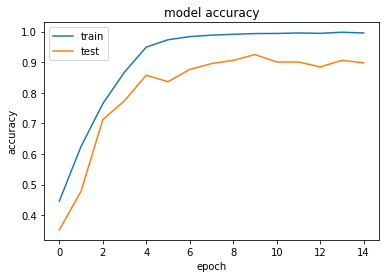

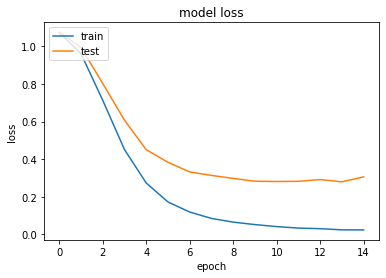

In [14]:
# History plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Conclusions and Next Steps

Develop any ideas you may have regarding the improvement of the solution. If given more time or resources, which steps would you like to take?

First, I would change the style of coding, instead of Tensorflow use Pytorch, that will make easier to optimize the model and makes easier the use of cuda devices (personal opinion).
Regarding to the model it actually obtain pretty nice results, but we can clearly observe an overfitting. Some considerations would be to perfom some data augmentation to solve this problem as the dataset is small. What is more, for optimizing the model a random search on hyperparameters could be performed, including here the deepness of the network as a hyperparameter and modify it by creating a model from convolutional blocks stored on a function.